<a href="https://colab.research.google.com/github/rahul-727/ML/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          0        2736     1115          228          0       0   24   
1          1        3258     1177          217          2       0   23   
2          2        2104     2040          111          0       0   24   
3          3        5435      289          308          0       0   21   
4          4        6899     1822          459          2       0   25   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       2        0              0          1               1             5068   
1       1      743              0          0               1             5639   
2       8     5793              2          1               0             5707   
3       1        0              1          0               0             4704   
4       2     3696              0          1               1             3925   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [ ]:
dataset = df.drop(columns= ['RowNumber','Surname','CustomerId','Geography'])

In [ ]:
print(dataset)

      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619  Female   42       2       0.00              1          1   
1             608  Female   41       1   83807.86              1          0   
2             502  Female   42       8  159660.80              3          1   
3             699  Female   39       1       0.00              2          0   
4             850  Female   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771    Male   39       5       0.00              2          1   
9996          516    Male   35      10   57369.61              1          1   
9997          709  Female   36       7       0.00              1          0   
9998          772    Male   42       3   75075.31              2          1   
9999          792  Female   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  
0  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(df)


In [ ]:
from scipy.stats import zscore


In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [ ]:
zscore_df = df.apply(zscore)

In [ ]:
o_c=((zscore_df>3)|(zscore_df<-3)).sum()
o_c

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                133
Tenure               0
Balance              0
NumOfProducts       60
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np

# Assuming zscore_df is your DataFrame containing z-scores
# and you want to drop rows where z-score is greater than 3 or less than -3
outlier_mask = (zscore_df > 3) | (zscore_df < -3)

# Find rows where at least one z-score is an outlier
outlier_rows = np.any(outlier_mask, axis=1)

# Filter out rows with outliers
cleaned_df = zscore_df[~outlier_rows]

<ipython-input-44-a21be11d8890>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Age_Category'] = pd.cut(cleaned_df['Age'], bins= age_bin_edges, labels=age_bin_labels)


RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             0        2736     1115          228          0       0   24   
1             1        3258     1177          217          2       0   23   
2             2        2104     2040          111          0       0   24   
3             3        5435      289          308          0       0   21   
4             4        6899     1822          459          2       0   25   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9995        1599     1999          380          0       1   21   
9996       9996         161     1336          125          0       1   17   
9997       9997         717     1570          318          0       0   18   
9998       9998        4656     2345          381          1       1   24   
9999       9999        2497     2751          401          0       0   10   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2        0              0          1               1   
1          1      743              0          0               1   
2          8     5793              2          1               0   
3          1        0              1          0               0   
4          2     3696              0          1               1   
...      ...      ...            ...        ...             ...   
9995       5        0              1          1               0   
9996      10      124              0          1               1   
9997       7        0              0          0               1   
9998       3      427              1          1               0   
9999       4     4112              0          1               0   

      EstimatedSalary  Exited  
0                5068       1  
1                5639       0  
2                5707       1  
3                4704       0  
4                3925       0  
...               ...     ...  
9995             4827       0  
9996             5087       0  
9997             2062       1  
9998             4639       1  
9999             1878       0  

[10000 rows x 14 columns]

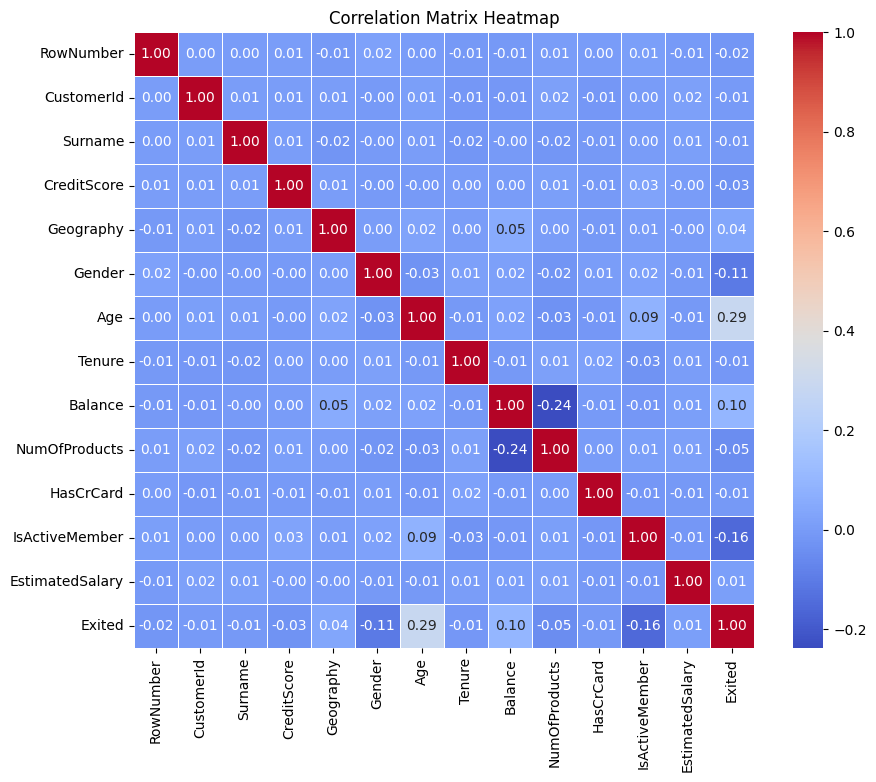

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

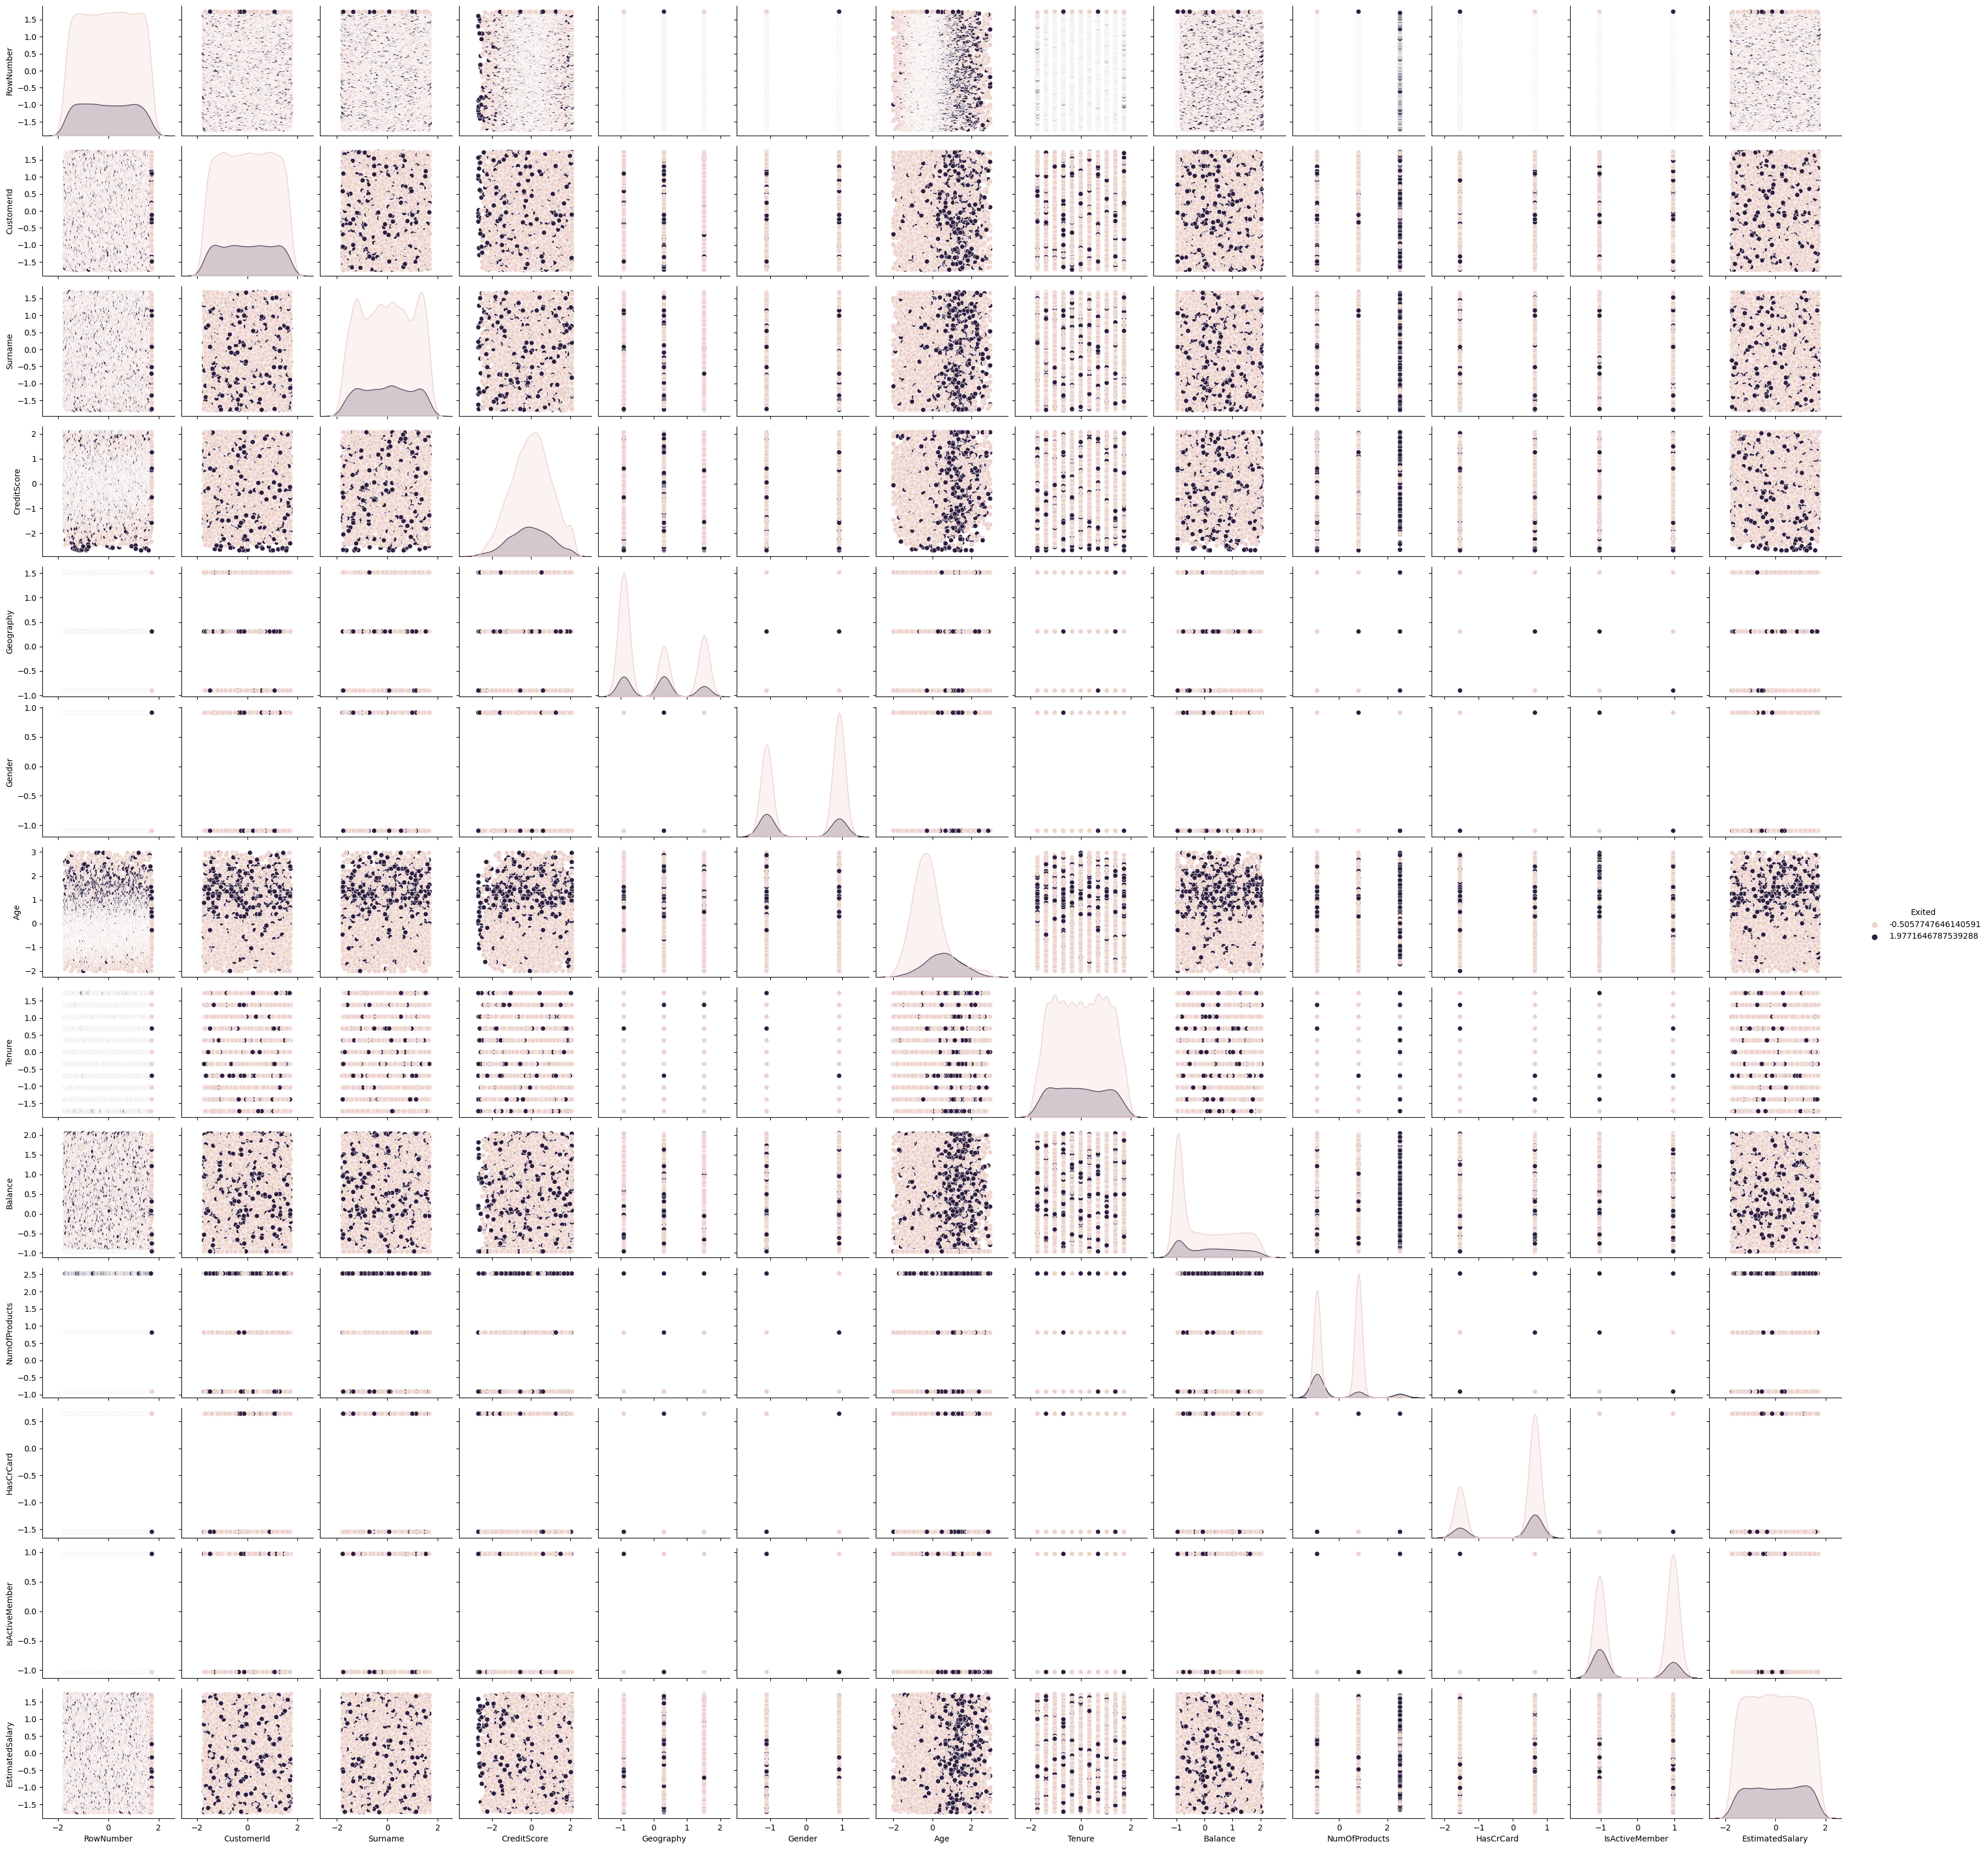

In [ ]:
sns.pairplot(cleaned_df, hue="Exited", diag_kind="kde")
plt.show()

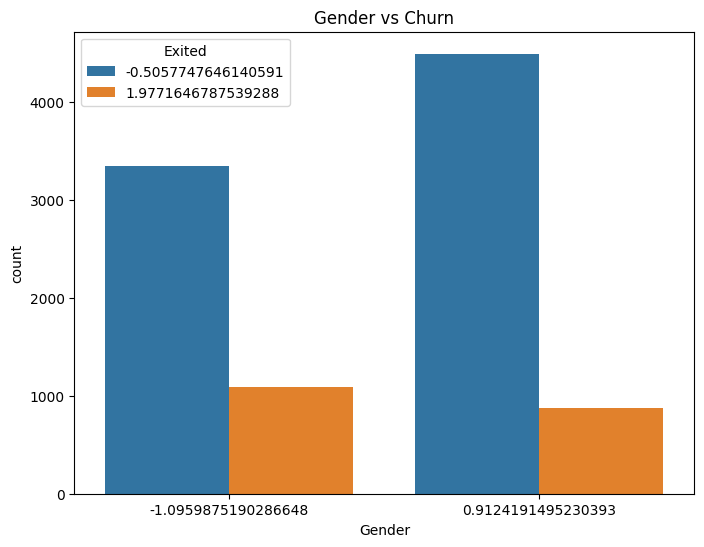

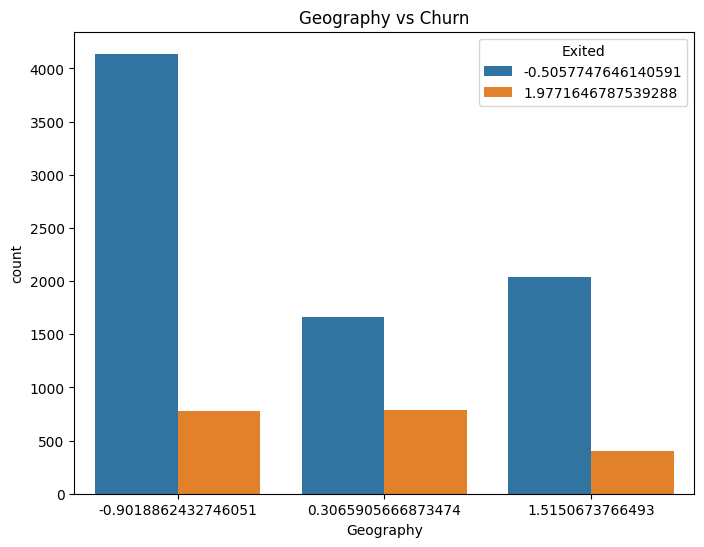

In [ ]:
categorical_vars = ["Gender", "Geography"]
for var in categorical_vars:
  plt.figure(figsize=(8, 6))
  sns.countplot(data=cleaned_df, x=var, hue="Exited")
  plt.title(f"{var} vs Churn")
  plt.show()

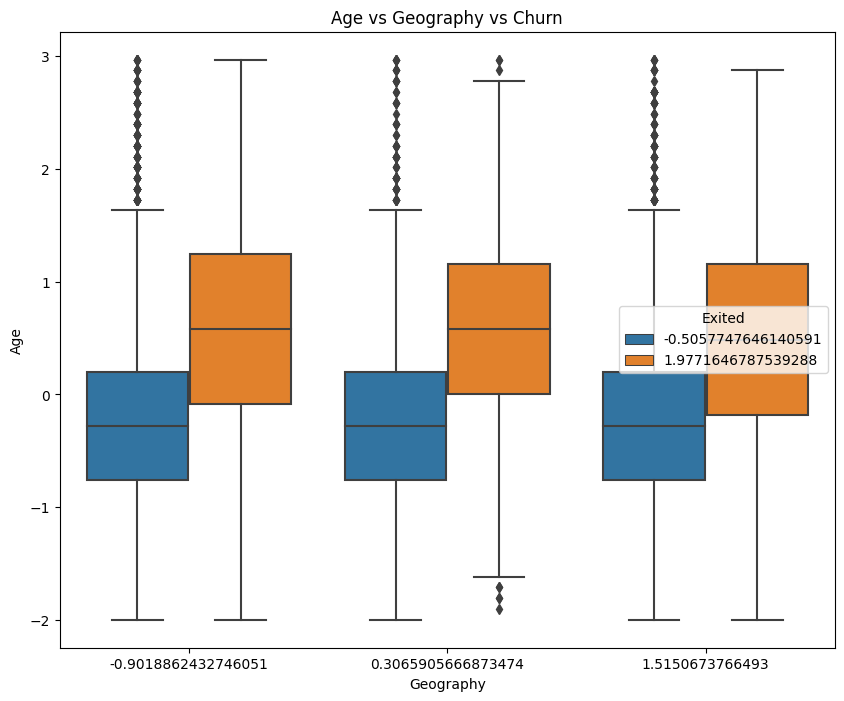

In [ ]:
numeric_var = "Age"
categorical_var = "Geography"
plt.figure(figsize=(10, 8))
sns.boxplot(data=cleaned_df, x=categorical_var, y=numeric_var, hue="Exited")
plt.title(f"{numeric_var} vs {categorical_var} vs Churn")
plt.show()

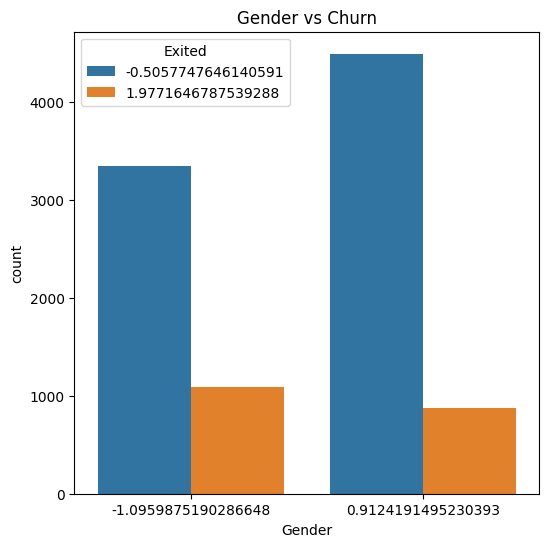

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=cleaned_df, x="Gender", hue="Exited")
plt.title("Gender vs Churn")
plt.show()

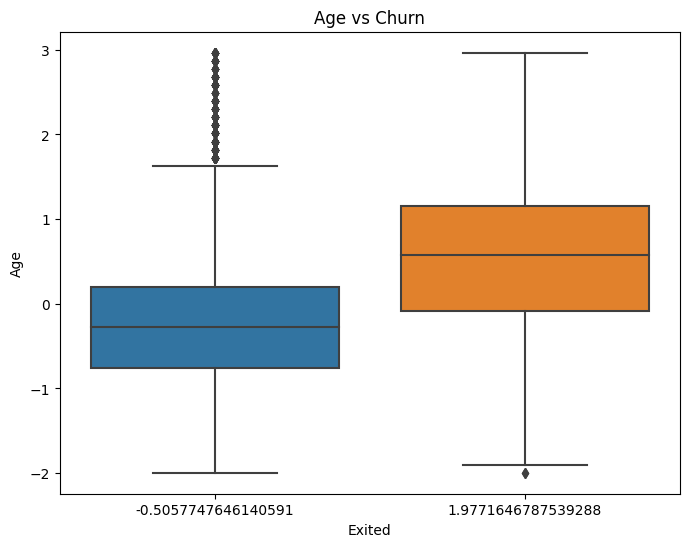

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_df, x="Exited", y="Age")
plt.title("Age vs Churn")
plt.show()

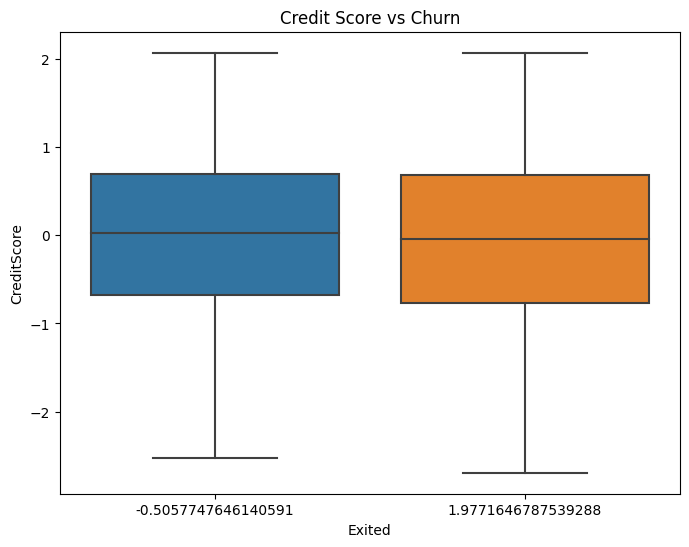

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_df, x="Exited", y="CreditScore")
plt.title("Credit Score vs Churn")
plt.show()

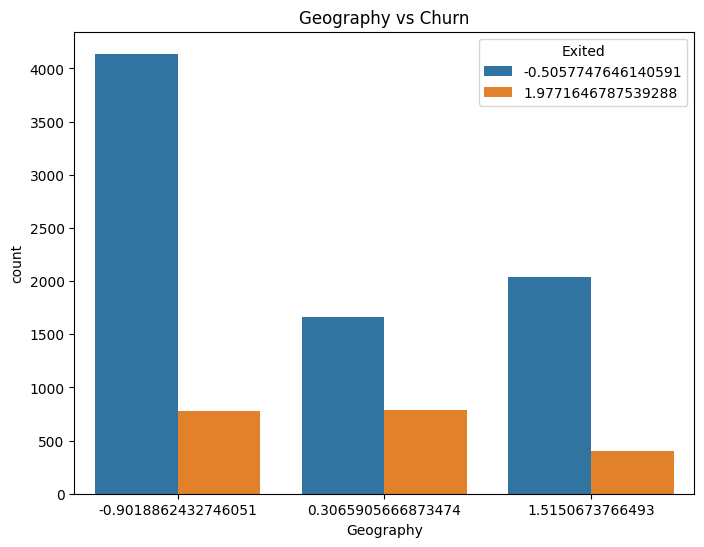

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=cleaned_df, x="Geography", hue="Exited")
plt.title("Geography vs Churn")
plt.show()

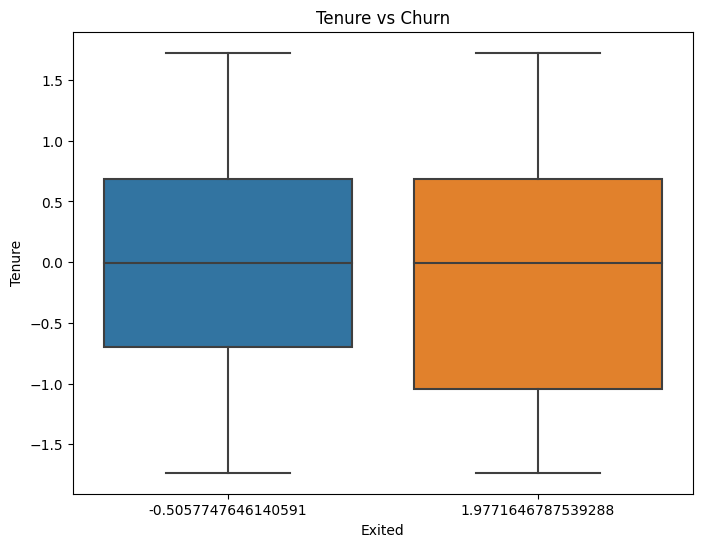

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_df, x="Exited", y="Tenure")
plt.title("Tenure vs Churn")
plt.show()

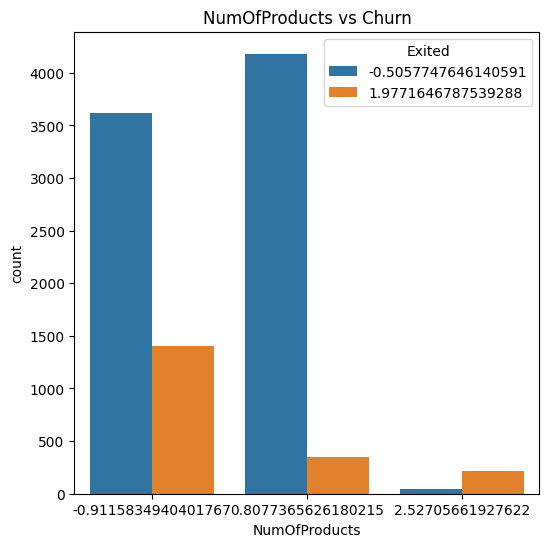

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=cleaned_df, x="NumOfProducts", hue="Exited")
plt.title("NumOfProducts vs Churn")
plt.show()

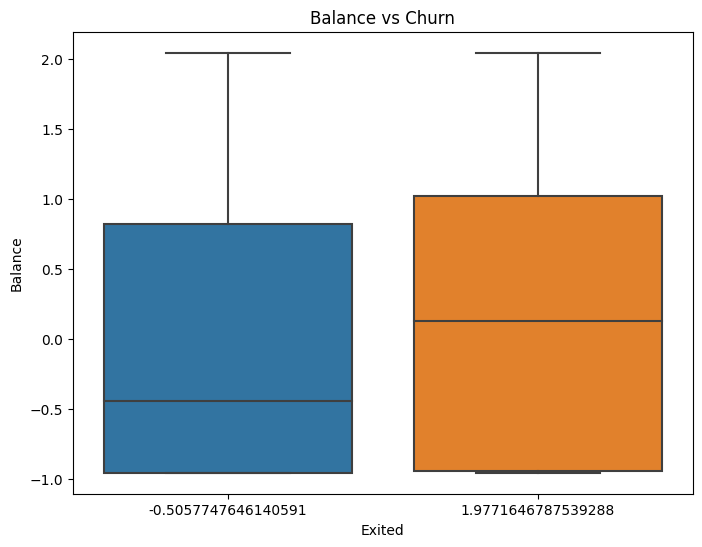

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_df, x="Exited", y="Balance")
plt.title("Balance vs Churn")
plt.show()

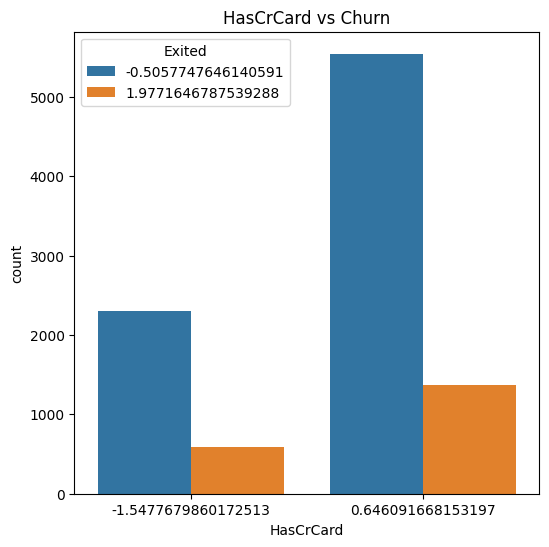

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=cleaned_df, x="HasCrCard", hue="Exited")
plt.title("HasCrCard vs Churn")
plt.show()

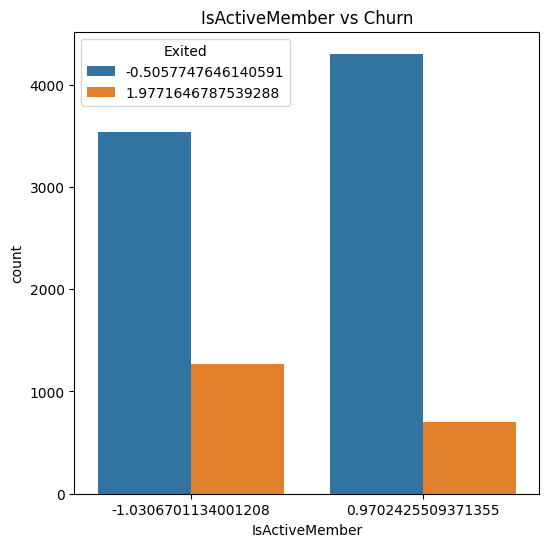

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=cleaned_df, x="IsActiveMember", hue="Exited")
plt.title("IsActiveMember vs Churn")
plt.show()

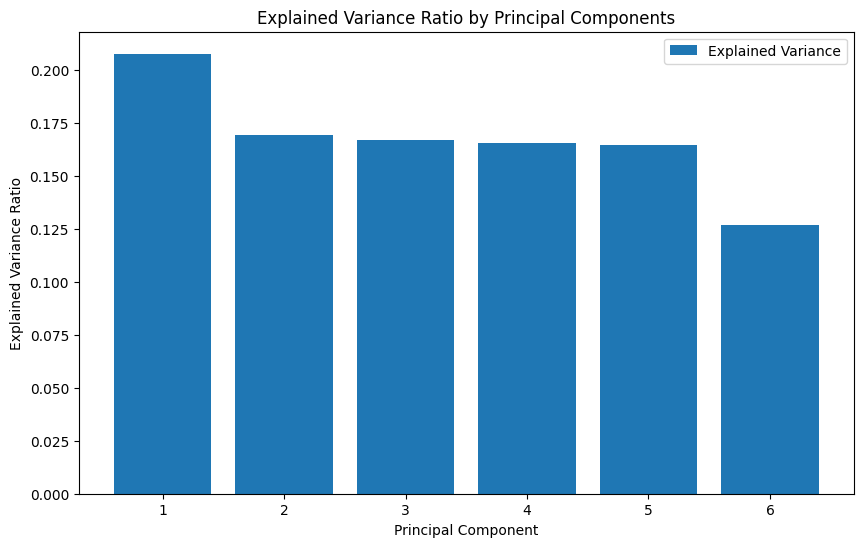

Explained Variance for PC1: 0.2075
Explained Variance for PC2: 0.1690
Explained Variance for PC3: 0.1668
Explained Variance for PC4: 0.1654
Explained Variance for PC5: 0.1647
Explained Variance for PC6: 0.1266
   RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          0        2736     1115          228          0       0   24   
1          1        3258     1177          217          2       0   23   
2          2        2104     2040          111          0       0   24   
3          3        5435      289          308          0       0   21   
4          4        6899     1822          459          2       0   25   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       2        0              0          1               1             5068   
1       1      743              0          0               1             5639   
2       8     5793              2          1               0             5707   
3       1        0   

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_columns])
pca = PCA()
pca_result = pca.fit_transform(df_scaled)
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, align='center', label='Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend()
plt.show()
# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance, start=1):
  print(f"Explained Variance for PC{i}: {ratio:.4f}")

# Select a number of principal components to retain
n_components = 3
# You can choose a different number based on the explained variance plot

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Concatenate the PCA components with the original DataFrame
df_with_pca = pd.concat([df, pca_df], axis=1)

# Print the first few rows of the DataFrame with PCA components
print(df_with_pca.head())

In [ ]:
age_bin_edges = [0, 30, 60, np.inf]
age_bin_labels = ['Young', 'Adult','Senior']

In [ ]:
cleaned_df_copy = cleaned_df.copy()
cleaned_df_copy['Age_Category'] = pd.cut(cleaned_df['Age'], bins=age_bin_edges, labels=age_bin_labels)


<ipython-input-53-2dbe7cdd25b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_df_copy.corr()


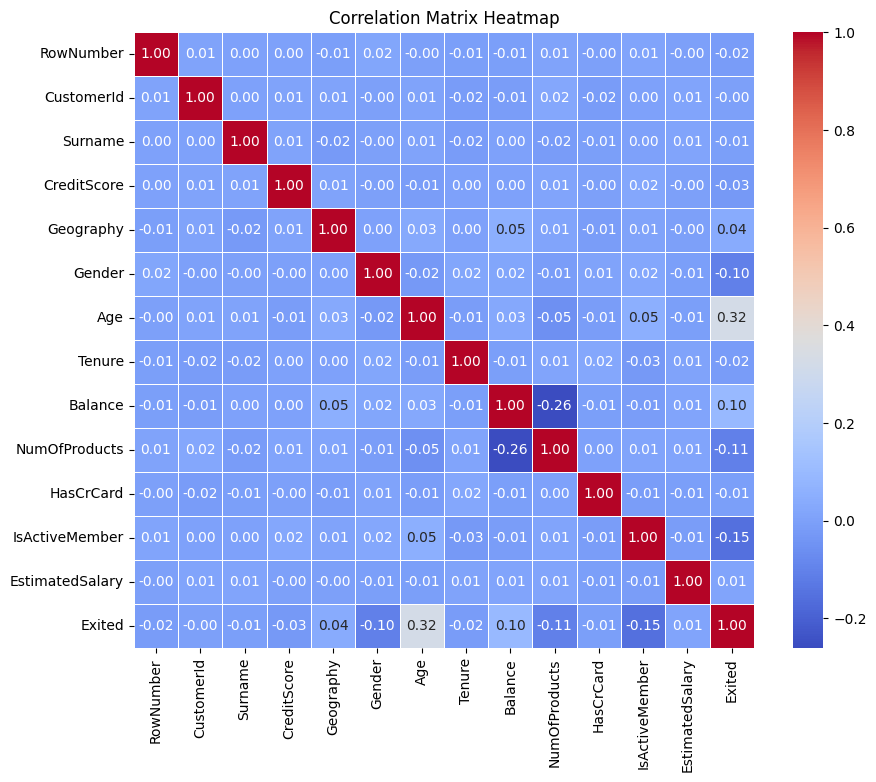

In [ ]:
correlation_matrix = cleaned_df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()